# **AP157 Image Processing Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Daffon, David D>\
_Student No._: 2021-04594\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



##### Author's note

In [3]:
N = 400
xx = np.linspace(0, 1, N)
X, Y = np.meshgrid(xx, xx)
A = 255

sin1 = (0.5*np.sin((2*np.pi*X)*1) + 0.5)*A
sin2 = (0.5*np.sin((2*np.pi*X)*3) + 0.5)*A
sin3 = (0.5*np.sin((2*np.pi*X)*5) + 0.5)*A

(0.0, 400.01, 0.0, 400.01)

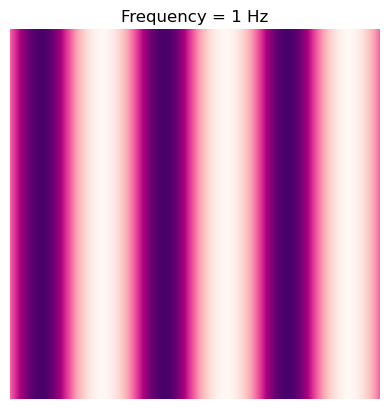

In [4]:
plt.imshow(sin2, cmap='RdPu')

plt.title('Frequency = 1 Hz')

plt.xlim(0, 400.01)
plt.ylim(0, 400.01)
plt.axis('off')

Text(0.5, 0.92, '3D View of Sinusoid')

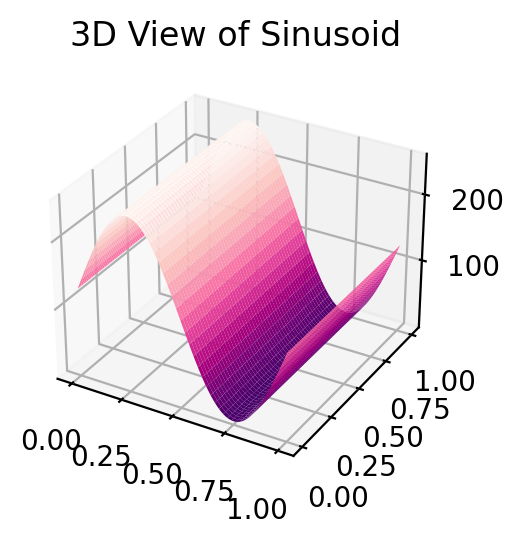

In [5]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax = fig.add_subplot(222, projection='3d')

ax.plot_surface(X, Y, sin1, cmap='RdPu_r')
ax.set_box_aspect(aspect=None)
ax.set_title("3D View of Sinusoid")

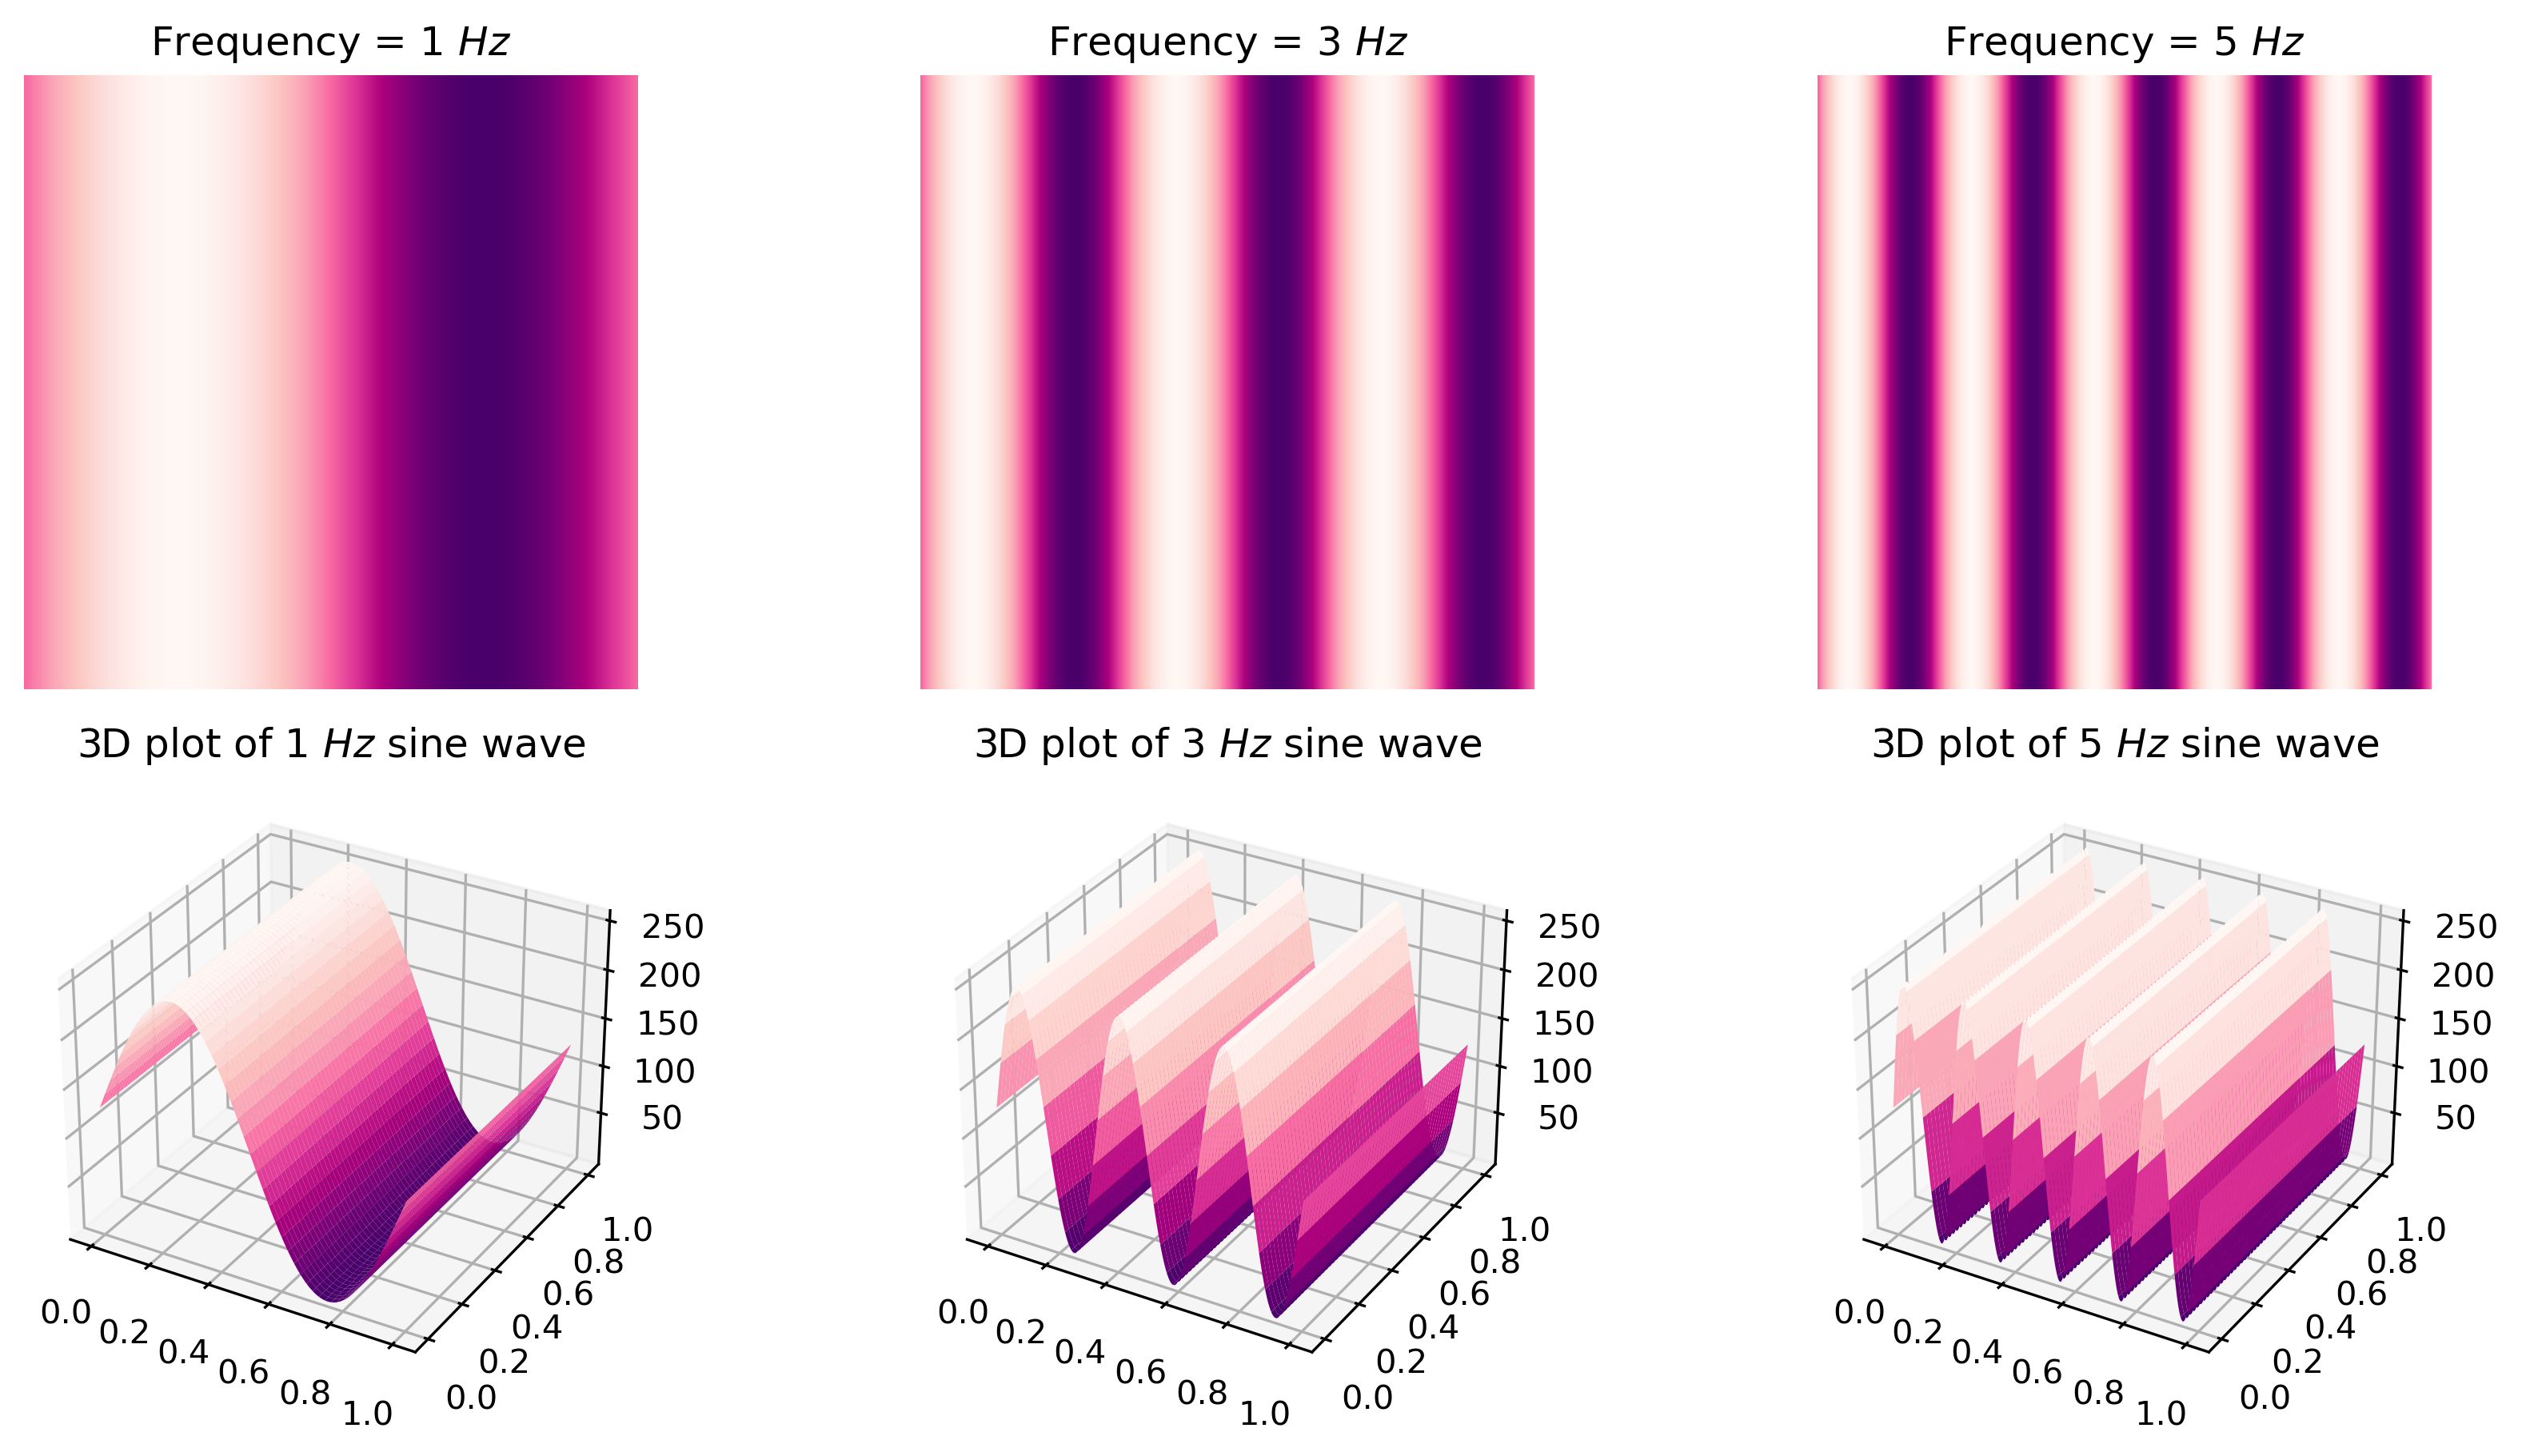

In [6]:
fig = plt.figure(figsize=(12, 6), dpi=300)
j = -1

for i in range(1, 4):
    j+=2

    N = 400
    xx = np.linspace(0, 1, N)
    X, Y = np.meshgrid(xx, xx)
    A = 255

    sin = (0.5*np.sin((2*np.pi*X)*j) + 0.5)*A

    plt.subplot(2, 3, i)

    plt.title(f'Frequency = {j} $Hz$')
    plt.axis('off')  
    plt.imshow(sin, cmap='RdPu_r')

    ax = fig.add_subplot(2, 3, i+3, projection='3d')
    ax.set_title(f'3D plot of {j} $Hz$ sine wave')
    ax.plot_surface(X, Y, sin, cmap='RdPu_r')   
    ax.grid(True) 

plt.tight_layout()
plt.show()


#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

##### Author's note

For my Olympic rings, I followed their logo's color scheme from 2010-onwards where the yellow ring is turned more orange and the colors are generally darker. To achieve this, I kept all channels (R, G, B) on even for the red, blue, and green rings. 

I played around with the ratio of colors per ring to achieve not just the color, but the desired shade (to the best that I can). This also has the added effect of making the color darker. In the real image, keeping all 3 channels makes it brighter; therefore, in inverse the colors appear darker. I employed a color wheel to guide me in manipulating the ratios between the channels.

I disliked the appearance of the tick labels and the square proportions of the plot, so I adjusted them accordingly to fit my aesthetic sense. I made the plot rectangular by setting a y-limit, and removed the tick labels by passing an empty list on xticks and yticks.

Interestingly, this has also removed the overlap of colors where the rings intersect. I do not completely understand why this occurs, but it is a welcome effect. To this point, I leave this note to myself to ask the instructors why this happens in the future.

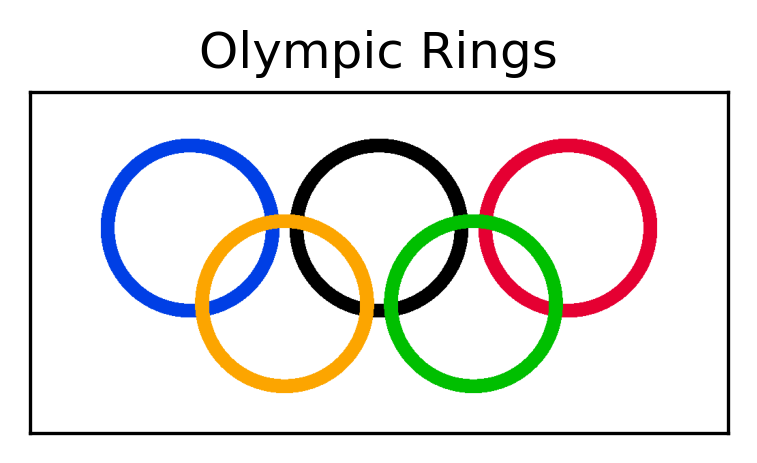

In [36]:
N = 1024 # Creating the meshgrid.
x = np.linspace(-15, 15, N)
y = x
X, Y = np.meshgrid(x, y)

Rd, Gn, Bl = np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N)) # 

Rt, Rc = 3.25, 3.85# Setting our outer and inner radii.

xt, yt = 1.25*Rt, Rt # Defining the variables for shifting our circles. These seem to yield the best spacing.

# Upper center, black ring
R = np.sqrt((X) ** 2 + (Y) ** 2) # X and Y are not manipulated as this serves as our center ring.
Rd[np.where((R < Rc) & (R >= Rt))] = 1.0
Gn[np.where((R < Rc) & (R >= Rt))] = 1.0
Bl[np.where((R < Rc) & (R >= Rt))] = 1.0

# Upper left, blue ring
R = np.sqrt((X + 2*xt) ** 2 + (Y) ** 2) # X is shifted to the left by 2*xt, Y is unchanged.
Rd[np.where((R < Rc) & (R >= Rt))] = 1.0
Gn[np.where((R < Rc) & (R >= Rt))] = 0.75
Bl[np.where((R < Rc) & (R >= Rt))] = 0.1

# Upper right, red ring
R = np.sqrt((X - 2*xt) ** 2 + (Y) ** 2) # X is shifted to the right by 2*xt, Y is unchanged.
Rd[np.where((R < Rc) & (R >= Rt))] = 0.1
Gn[np.where((R < Rc) & (R >= Rt))] = 1.0
Bl[np.where((R < Rc) & (R >= Rt))] = 0.8

# Lower left, orange ring
R = np.sqrt((X + xt) ** 2 + (Y - yt) ** 2) # X is shifted to the left by xt, Y is shifted down by yt.
Rd[np.where((R < Rc) & (R >= Rt))] = 0.01
Gn[np.where((R < Rc) & (R >= Rt))] = 0.35
Bl[np.where((R < Rc) & (R >= Rt))] = 1.0

# Lower right, green ring
R = np.sqrt((X - xt) ** 2 + (Y - yt) ** 2) # X is shifted to the right by xt, Y is shifted down by yt.
Rd[np.where((R < Rc) & (R >= Rt))] = 1.0
Gn[np.where((R < Rc) & (R >= Rt))] = 0.25
Bl[np.where((R < Rc) & (R >= Rt))] = 1.0


I_rgb = np.zeros((N, N, 3)) # Creating the 3D array that serves as our image.
I_rgb[..., 0] = Rd
I_rgb[..., 1] = Gn
I_rgb[..., 2] = Bl

plt.figure(figsize=(3, 1.5), dpi=300) # Plotting the image.
plt.imshow(1-I_rgb)
plt.ylim(812, 312)
plt.title("Olympic Rings")
plt.xticks([])
plt.yticks([])
plt.show()

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

c:\Users\David\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


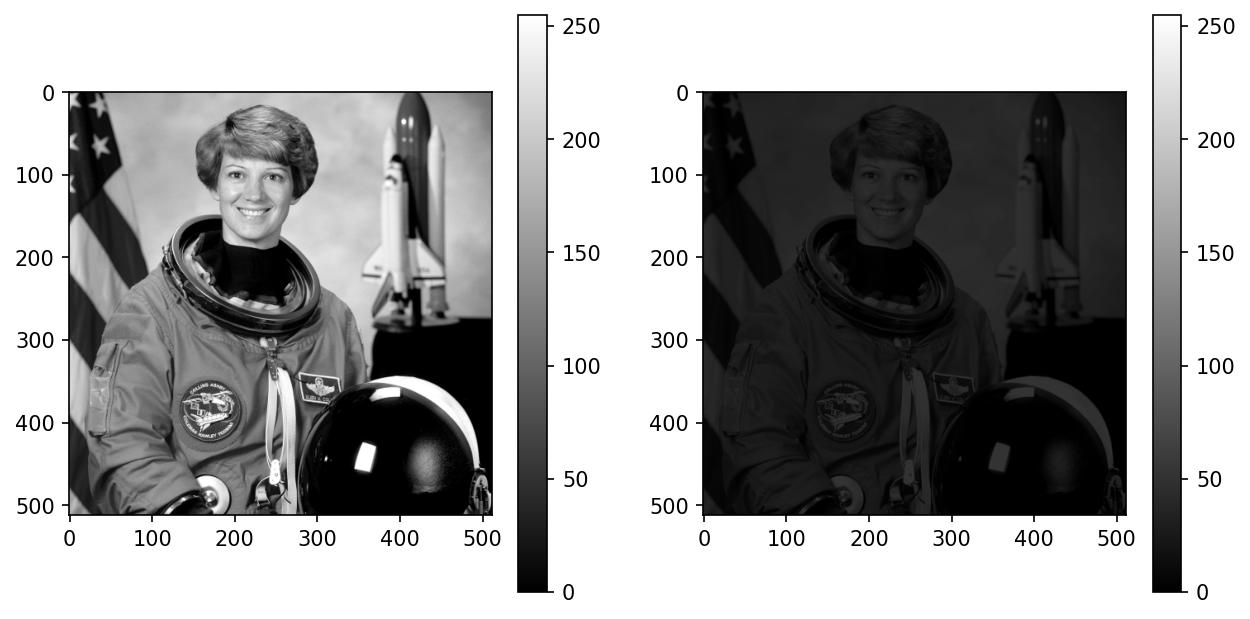

In [8]:
from skimage import color, data, exposure
from skimage.transform import rescale
import skimage as ski

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 150)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

In [10]:
def con_stretch(img):
    img_s = img*((255-0)/(np.max(img)-np.min(img)))
    return img_s

def hister(img, p):
    hist, bins = np.histogram(img.flatten(), p, [np.min(range(p)), np.max(range(p))])
    cdf = hist.cumsum()
    cdf_norm = cdf / np.max(cdf)
    plot_hist = img.flatten()

    return plot_hist, bins, cdf_norm

In [11]:
astro_stretch = con_stretch(img_low_contrast) # Contrast stretching implementation.

hist1, bins1, cdf_norm1 = hister(img_low_contrast, 256) # Declaring as variables the necessary values for plotting the PDFs and CDFs.
hist2, bins2, cdf_norm2 = hister(astro_stretch, 256) # Shows the advantage of creating the hister function.

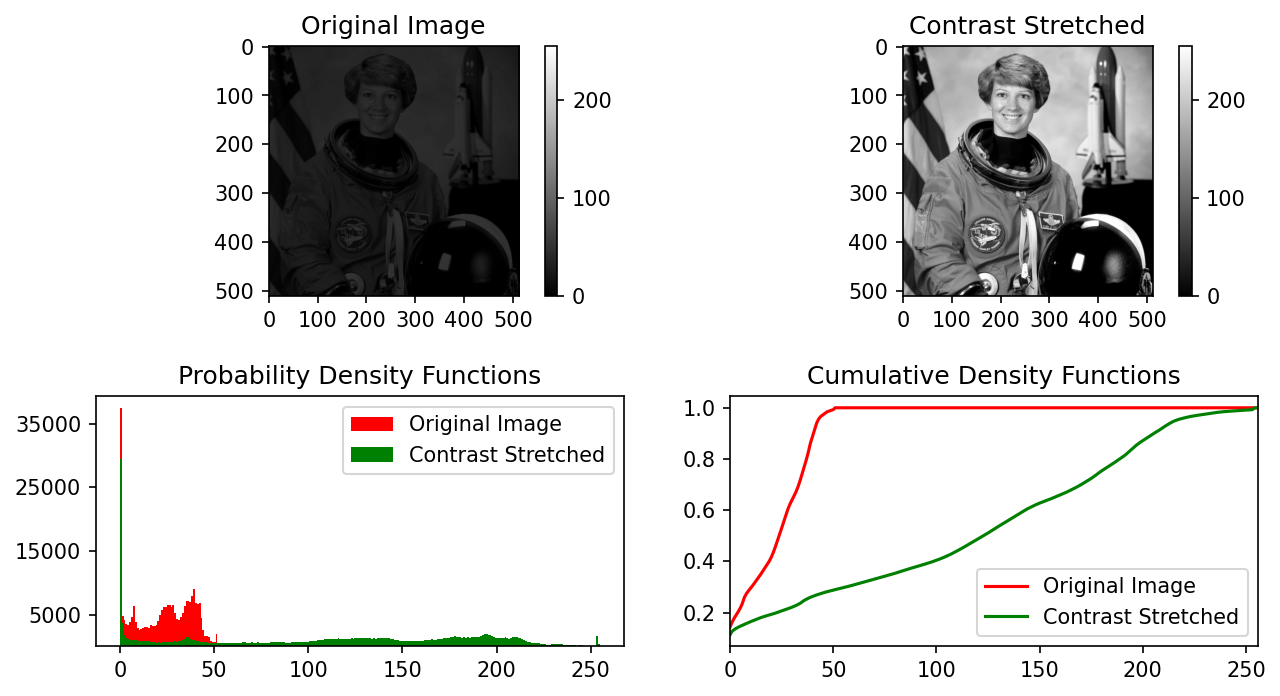

In [12]:
plt.figure(figsize=(10,5), dpi = 150)
plt.subplot(221)
plt.title("Original Image")
plt.xticks([i for i in np.arange(0, 513, 100)])
plt.yticks([i for i in np.arange(0, 513, 100)])
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

plt.subplot(222)
plt.title("Contrast Stretched")
plt.xticks([i for i in np.arange(0, 513, 100)])
plt.yticks([i for i in np.arange(0, 513, 100)])
plt.imshow(astro_stretch, cmap = 'gray', vmax = 255)
plt.colorbar()

plt.subplot(223)
plt.title("Probability Density Functions")
plt.yticks([i for i in np.arange(5000, 35001, 10000)])
plt.hist(hist1, bins1, [0, 256], color='red', label='Original Image')
plt.hist(hist2, bins2, [0, 256], color='green', label='Contrast Stretched')
plt.legend()

plt.subplot(224)
plt.title("Cumulative Density Functions")
plt.plot(cdf_norm1, color='red', label='Original Image')
plt.plot(cdf_norm2, color='green', label='Contrast Stretched')
plt.xlim([0, 256])
plt.legend()

plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

#### Contrast Stretching on different image. 

In [34]:
makima_og = ski.io.imread("makima halo.jpg", as_gray=True)*256
makima_dim = makima_og/10

makima = con_stretch(makima_dim)
hist3, bins3, cdf_norm3 = hister(makima_dim, 256)
hist4, bins4, cdf_norm4 = hister(makima, 256)

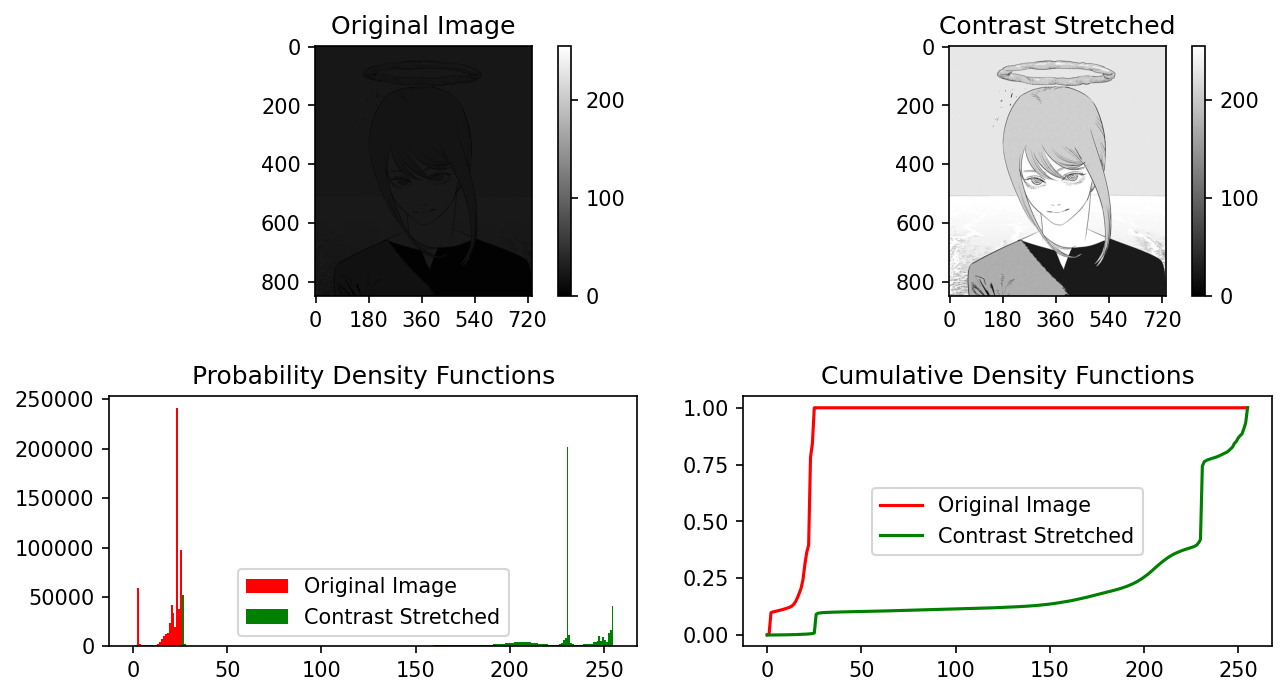

In [35]:
plt.figure(figsize=(10,5), dpi = 150)
plt.subplot(221)
plt.title("Original Image")
plt.xticks([i for i in np.arange(0, 736, 180)])
plt.imshow(makima_dim, cmap = 'gray', vmax = 255)
plt.colorbar()

plt.subplot(222)
plt.title("Contrast Stretched")
plt.xticks([i for i in np.arange(0, 736, 180)])
plt.imshow(makima, cmap = 'gray', vmax = 255)
plt.colorbar()

plt.subplot(223)
plt.title("Probability Density Functions")
plt.hist(hist3, bins3, [0, 256], color='red', label='Original Image')
plt.hist(hist4, bins4, [0, 256], color='green', label='Contrast Stretched')
plt.yticks([i for i in np.arange(0, 250001, 50000)])
plt.legend()

plt.subplot(224)
plt.title("Cumulative Density Functions")
plt.plot(cdf_norm3, color='red', label='Original Image')
plt.plot(cdf_norm4, color='green', label='Contrast Stretched')
plt.legend()

plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
plt.show()